In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from basico import *

In [2]:
print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("basiCO version:", basico.__version__)

NumPy version: 2.1.1
Pandas version: 2.2.3
Matplotlib version: 3.9.2
basiCO version: 0.75


Load the model defined using COPASI UI

In [8]:
load_model("model.cps")

<CDataModel "Root">

Check the species, reactions, and global parameters

In [9]:
get_species()

,compartment,type,unit,initial_concentration,initial_particle_number,initial_expression,expression,concentration,particle_number,rate,particle_number_rate,key,sbml_id,transition_time,display_name
name,,,,,,,,,,,,,,,
TfR,compartment,reactions,nmol/l,0.000498,1.499786e+08,1500 * 1e5 * 1e9 / ( 6.023 * 1e23 * 500 * 1e-6 ),,0.000498,1.499786e+08,-0.000031,-9.373663e+06,Metabolite_0,,1.600000e+01,TfR
Tf-TfR,compartment,reactions,nmol/l,0.000000,0.000000e+00,,,0.000000,0.000000e+00,0.000031,9.373663e+06,Metabolite_1,,0.000000e+00,Tf-TfR
Tf-TfR_int,compartment,reactions,nmol/l,0.000000,0.000000e+00,,,0.000000,0.000000e+00,0.000000,0.000000e+00,Metabolite_2,,NaN,Tf-TfR_int
Tf,compartment,reactions,nmol/l,62.500000,1.881919e+13,Values[Tf_conc].InitialValue * 1e-6 * 1e3 * 1e...,,62.500000,1.881919e+13,-0.000031,-9.373663e+06,Metabolite_3,,2.007667e+06,Tf


In [10]:
get_reactions()

,scheme,flux,particle_flux,function,key,sbml_id,display_name,mapping
name,,,,,,,,
R1,Tf + TfR = Tf-TfR,1.556533e-08,9.373663e+06,Mass action (reversible),Reaction_0,,(R1),"{'k1': 'ka', 'substrate': ['Tf', 'TfR'], 'k2':..."
R2,Tf-TfR -> Tf-TfR_int,0.000000e+00,0.000000e+00,Mass action (irreversible),Reaction_1,,(R2),"{'k1': 'kint', 'substrate': 'Tf-TfR'}"


In [11]:
get_parameters()

,type,unit,initial_value,initial_expression,expression,value,rate,key,sbml_id,display_name
name,,,,,,,,,,
ka,fixed,(nmol/l)^-1*min^-1,0.001,,,0.001,0.0,ModelValue_0,,Values[ka]
KD,fixed,nmol/l,5.000,,,5.000,0.0,ModelValue_1,,Values[KD]
kint,fixed,min^-1,0.500,,,0.500,0.0,ModelValue_2,,Values[kint]
Tf_conc,fixed,ug/ml,5.000,,,5.000,0.0,ModelValue_3,,Values[Tf_conc]
kd,fixed,min^-1,0.005,Values[KD].InitialValue * Values[ka].InitialValue,,0.005,0.0,ModelValue_4,,Values[kd]


Parameter scan

In [12]:
set_scan_items([{'item': 'Values[ka].InitialValue', 'values': [0.001, 0.002, 0.003, 0.005, 0.01, 0.02, 0.025]}])

data1 = run_scan(output = ['Time', 'Values[ka].InitialValue', 'Values[KD].InitialValue', 
                          'Values[kint].InitialValue', 'Values[Tf_conc].InitialValue',
                          '[Tf]', '[TfR]', '[Tf-TfR]', '[Tf-TfR_int]'])

# k_int = 0.5 min, K_D = 5 nM, Tf_conc = 5 ug/ml

# change column names
data1.columns = ['time', 'k_a', 'K_D', 'k_int', 'Tf_conc', 'Tf', 'TfR', 'Tf-TfR', 'Tf-TfR_int']

# change TfR to TfR/(TfR + Tf-TfR + Tf-TfR_int), similarly for Tf-TfR and Tf-TfR_int columns
data1['TfR_relative'] = data1['TfR']/(data1['TfR'] + data1['Tf-TfR'] + data1['Tf-TfR_int'])
data1['Tf-TfR_relative'] = data1['Tf-TfR']/(data1['TfR'] + data1['Tf-TfR'] + data1['Tf-TfR_int'])
data1['Tf-TfR_int_relative'] = data1['Tf-TfR_int']/(data1['TfR'] + data1['Tf-TfR'] + data1['Tf-TfR_int'])

In [13]:
set_scan_items([{'item': 'Values[ka].InitialValue', 'values': np.linspace(0.001, 0.025, 50).tolist()},
                {'item': 'Values[KD].InitialValue', 'values': [1, 3, 5, 7, 10]},
                {'item': 'Values[kint].InitialValue', 'values': [0.2, 0.3, 0.4, 0.6, 0.8]},
                {'item': 'Values[Tf_conc].InitialValue', 'values': [1, 3, 5, 8, 10]}])

data2 = run_scan(output = ['Time', 'Values[ka].InitialValue', 'Values[KD].InitialValue', 
                          'Values[kint].InitialValue', 'Values[Tf_conc].InitialValue',
                          '[Tf]', '[TfR]', '[Tf-TfR]', '[Tf-TfR_int]'])

# change column names
data2.columns = ['time', 'k_a', 'K_D', 'k_int', 'Tf_conc', 'Tf', 'TfR', 'Tf-TfR', 'Tf-TfR_int']

# change TfR to TfR/(TfR + Tf-TfR + Tf-TfR_int), similarly for Tf-TfR and Tf-TfR_int columns
data2['TfR_relative'] = data2['TfR']/(data2['TfR'] + data2['Tf-TfR'] + data2['Tf-TfR_int'])
data2['Tf-TfR_relative'] = data2['Tf-TfR']/(data2['TfR'] + data2['Tf-TfR'] + data2['Tf-TfR_int'])
data2['Tf-TfR_int_relative'] = data2['Tf-TfR_int']/(data2['TfR'] + data2['Tf-TfR'] + data2['Tf-TfR_int'])

<>:37: SyntaxWarning: invalid escape sequence '\m'
<>:37: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_1170998/3518038107.py:37: SyntaxWarning: invalid escape sequence '\m'
  ax[1, 1].legend(title='$[Tf]_0$ ($\mu$g/ml)')


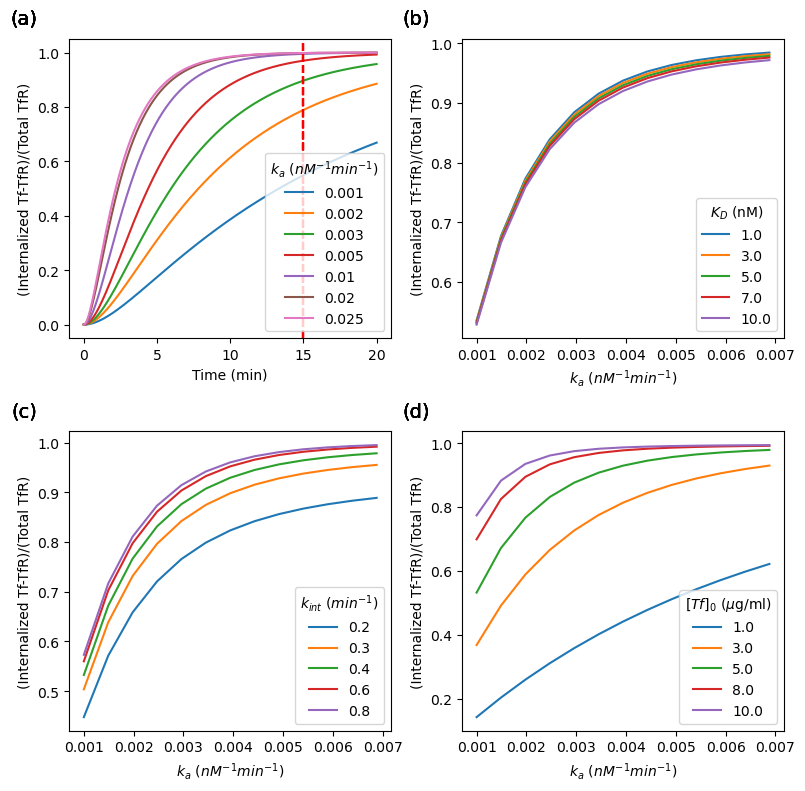

In [20]:
# Define the figure size and the number of subplots
fig, ax = plt.subplots(2, 2, figsize=(8, 8))

# Group by 'k_a' and plot each group
for key, grp in data1.groupby('k_a'):
    ax[0, 0].plot(grp['time'], grp['Tf-TfR_int_relative'], label=key)
    ax[0, 0].set_xlabel('Time (min)')
    ax[0, 0].set_ylabel('(Internalized Tf-TfR)/(Total TfR)')
    ax[0, 0].axvline(x=15, color='red', linestyle='--')
    ax[0, 0].legend(title='$k_a$ ($nM^{-1}min^{-1}$)')
    ax[0, 0].text(-0.1, 1.1, '(a)', transform=ax[0, 0].transAxes, fontsize=14, va='top', ha='right')

# Group by 'K_D' and plot each group
data_temp = data2[(data2['k_int'] == 0.4) & (data2['Tf_conc'] == 5) & (data2['time'] == 15) & (data2['k_a'] < 0.007)]
for key, grp in data_temp.groupby('K_D'):
    ax[0, 1].plot(grp['k_a'], grp['Tf-TfR_int_relative'], label=key)
    ax[0, 1].set_xlabel('$k_a$ ($nM^{-1}min^{-1}$)')
    ax[0, 1].set_ylabel('(Internalized Tf-TfR)/(Total TfR)')
    ax[0, 1].legend(title='$K_D$ (nM)')
    ax[0, 1].text(-0.1, 1.1, '(b)', transform=ax[0, 1].transAxes, fontsize=14, va='top', ha='right')

# Group by 'k_int' and plot each group
data_temp = data2[(data2['K_D'] == 5) & (data2['Tf_conc'] == 5) & (data2['time'] == 15) & (data2['k_a'] < 0.007)]
for key, grp in data_temp.groupby('k_int'):
    ax[1, 0].plot(grp['k_a'], grp['Tf-TfR_int_relative'], label=key)
    ax[1, 0].set_xlabel('$k_a$ ($nM^{-1}min^{-1}$)')
    ax[1, 0].set_ylabel('(Internalized Tf-TfR)/(Total TfR)')
    ax[1, 0].legend(title='$k_{int}$ ($min^{-1}$)')
    ax[1, 0].text(-0.1, 1.1, '(c)', transform=ax[1, 0].transAxes, fontsize=14, va='top', ha='right')

# Group by 'Tf_conc' and plot each group
data_temp = data2[(data2['k_int'] == 0.4) & (data2['K_D'] == 5) & (data2['time'] == 15) & (data2['k_a'] < 0.007)]
for key, grp in data_temp.groupby('Tf_conc'):
    ax[1, 1].plot(grp['k_a'], grp['Tf-TfR_int_relative'], label=key)
    ax[1, 1].set_xlabel('$k_a$ ($nM^{-1}min^{-1}$)')
    ax[1, 1].set_ylabel('(Internalized Tf-TfR)/(Total TfR)')
    ax[1, 1].legend(title='$[Tf]_0$ ($\mu$g/ml)')
    ax[1, 1].text(-0.1, 1.1, '(d)', transform=ax[1, 1].transAxes, fontsize=14, va='top', ha='right')

# Adjust layout to prevent overlap
plt.tight_layout()

# save the plot
plt.savefig('parameter_scan.png', dpi=300)

# Show the plot
plt.show()